In [1]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"E:\Download\2019机器学习sklearn课堂\Digit Recognizer\train.csv")

In [3]:
x = data.iloc[:, 1: ]
y = data.iloc[:, 0]
x.shape

(42000, 784)

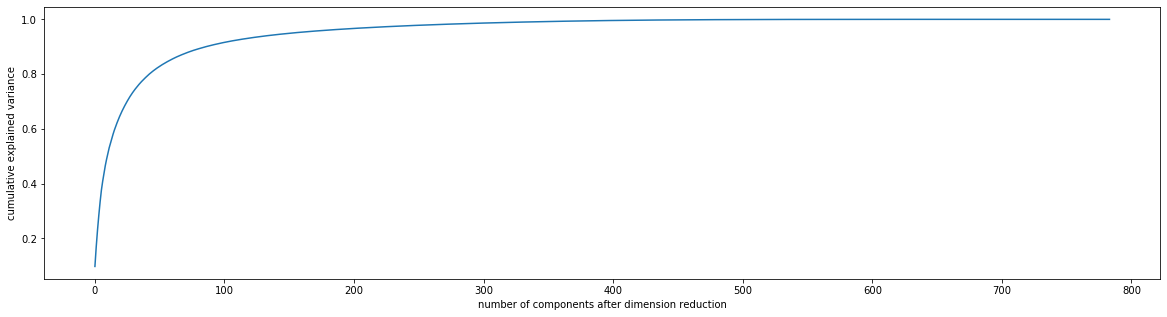

In [4]:
#画出累计方差贡献率曲线后，找到最佳维度范围i
pca = PCA().fit(x) #默认个数为x.shape中最小的那一个
plt.figure(figsize=[20, 5])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (11,) and (10,)

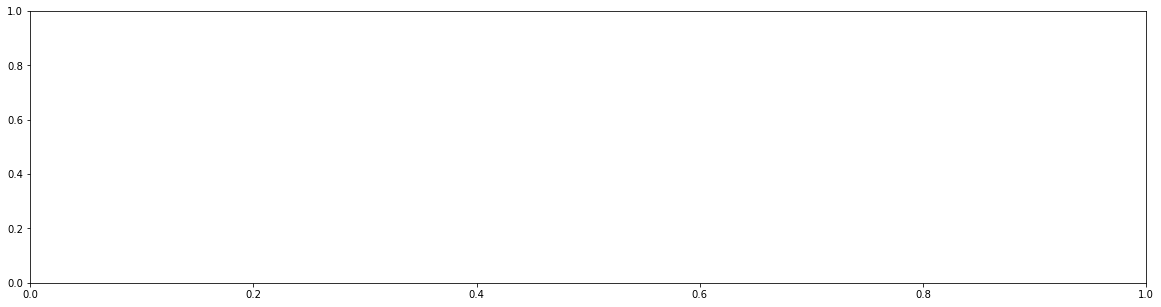

In [6]:
#选取一个转折点周围的一个数作为n_component
score = []
for i in range(1, 101, 10):
    x_dr = PCA(n_components=i).fit_transform(x)
    once = cross_val_score(RFC(n_estimators=10, random_state=0)
                           ,x_dr, y, cv=10).mean()
    score.append(once)

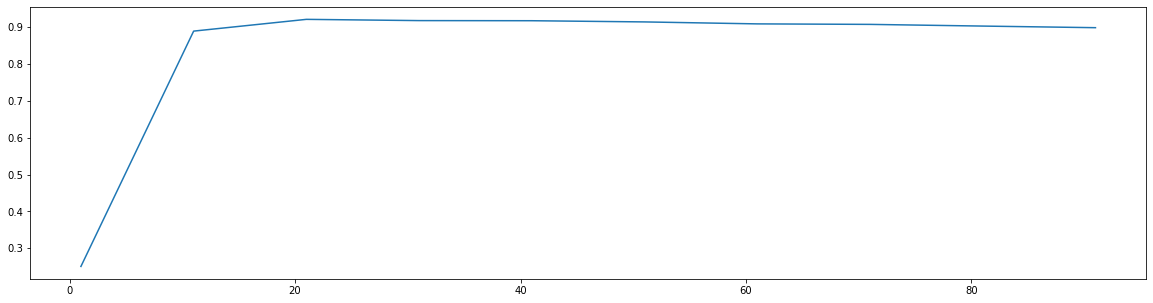

In [7]:
plt.figure(figsize=[20, 5])
plt.plot(range(1, 101, 10), score)
plt.show()

In [10]:
score1= []
for i in range(15, 25):
    x_dr = PCA(n_components=i).fit_transform(x)
    twice = cross_val_score(RFC(n_estimators=10, random_state=0)
                           , x_dr
                           , y, cv=10).mean()
    score1.append(twice)

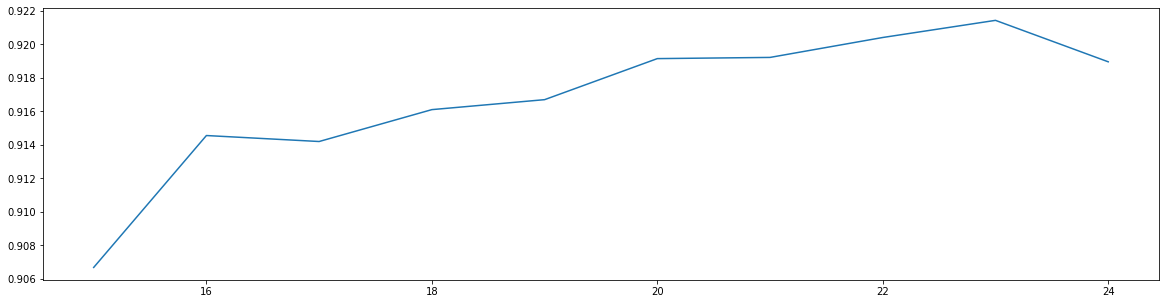

In [11]:
plt.figure(figsize=[20, 5])
plt.plot(range(15, 25), score1)
plt.show()